# Edad de los ladrones de guante blanco

Fuente: Statistics in Criminal Justice, David Weisburd, Chester Britt, https://doi.org/10.1007/978-1-4614-9170-5

**Hipótesis nula**: La edad media de los tres delitos es igual

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

## Datos

Edades por delito

In [2]:
guante_blanco = pd.read_csv("guante_blanco.csv", index_col=0)
print(guante_blanco)

         Malversación  Soborno  Monopolio
Persona                                  
1                  19       28         35
2                  21       29         46
3                  23       32         48
4                  25       40         53
5                  29       42         58
6                  30       48         61
7                  31       58         62
8                  35       58         62
9                  42       64         62
10                 49       68         75


In [3]:
sample_size = guante_blanco.size
sample_size

30

In [4]:
group_size = len(guante_blanco.index)
group_size

10

In [5]:
number_of_groups = len(guante_blanco.columns)
number_of_groups

3

In [6]:
guante_blanco.describe()

,Malversación,Soborno,Monopolio
count,10.000000,10.000000,10.000000
mean,30.400000,46.700000,56.200000
std,9.465728,14.742606,11.113555
min,19.000000,28.000000,35.000000
25%,23.500000,34.000000,49.250000
50%,29.500000,45.000000,59.500000
75%,34.000000,58.000000,62.000000
max,49.000000,68.000000,75.000000


<ErrorbarContainer object of 3 artists>

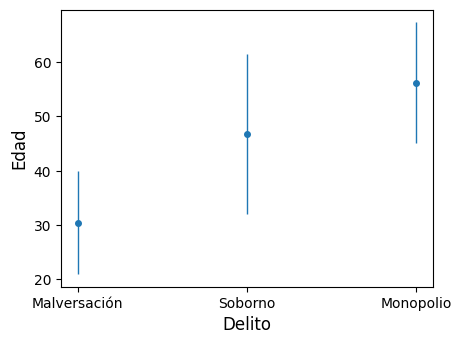

In [7]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel("Delito")
ax1.set_ylabel("Edad")
ax1.errorbar(x=guante_blanco.columns, y=guante_blanco.mean(), yerr=guante_blanco.std(), ls='', marker='o')

## Estadístico F crítico

In [8]:
significance = 0.05
ndof_between = number_of_groups - 1
ndof_within = sample_size - number_of_groups
F_distribution = scipy.stats.f(ndof_between, ndof_within)
F_critical = F_distribution.isf(significance)
F_critical

3.3541308285291986

## Estadístico F observado

*Nota*: Las varianzas muestrales usan el denominador n-1 (corrección de Bessel)

In [9]:
age_mean = guante_blanco.mean()
square_sum_between = group_size * (number_of_groups-1) * age_mean.var()
group_var = guante_blanco.var()
square_sum_within = (group_size-1) * group_var.sum()
F_observed = ( square_sum_between / ndof_between ) / (square_sum_within / ndof_within)
F_observed

11.866265713326968

## Test de Fisher con scipy

In [10]:
print(*guante_blanco.values.T)

[19 21 23 25 29 30 31 35 42 49] [28 29 32 40 42 48 58 58 64 68] [35 46 48 53 58 61 62 62 62 75]


In [11]:
F_observed, pvalue = scipy.stats.f_oneway(*guante_blanco.values.T)
print(f"F observado = {F_observed}")
print(f"Pvalor = {pvalue}")

F observado = 11.866265713326964
Pvalor = 0.0002004668746959287


Test de cola superior: rechazamos la hipótesis nula con una significancia de 0.05 (nivel de confianza 95%) porque el estadístico F observado es mayor al crítico. Esta condición es equivalente a que el pvalor observado sea menor a la significancia del test.
La región crítica corresponde a una varianza entre grupos mayor a la variancia dentro de los grupos.

## Plot

Text(11.866265713326964, 0.5, ' $F_{observado}$')

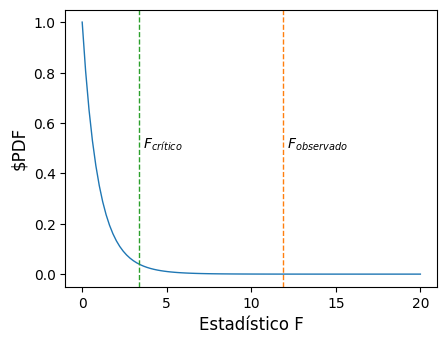

In [12]:
fig2, ax2 = plt.subplots()
ax2.set_xlabel("Estadístico F")
ax2.set_ylabel("$PDF")
x = np.linspace(0, 20, 100)
y = scipy.stats.f.pdf(x, ndof_between, ndof_within)
ax2.plot(x,y)
trans = ax2.get_xaxis_transform()
ax2.axvline(F_critical, color='tab:green', ls='--')
plt.text(F_critical, .5, r" $F_{crítico}$", transform=trans)
ax2.axvline(F_observed, color='tab:orange', ls='--')
plt.text(F_observed, .5, r" $F_{observado}$", transform=trans)